## Unsupervised Learning in Python - Part 2
> Part 2 - Visualization with hierarchical clustering and t-SNE
## Visualizing hierarchies
A hierarchy of groups
- Groups of living things can form hierarchy
- Clusters are contained in one another

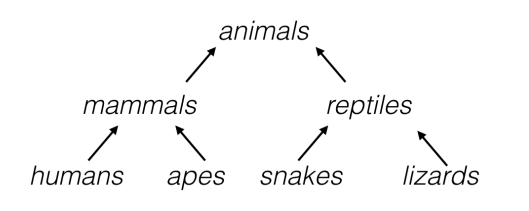

Hierarchical clustering with SciPy
*  Given `sample` (the array score), and `country_names`

### Exercise - Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [2]:
varieties_df = pd.read_csv('./datasets/varieties_grain.csv', index_col=[0])
varieties = varieties_df.to_numpy()
varieties.reshape((42,)) 

array(['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat',
       'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat'], dtype=object)

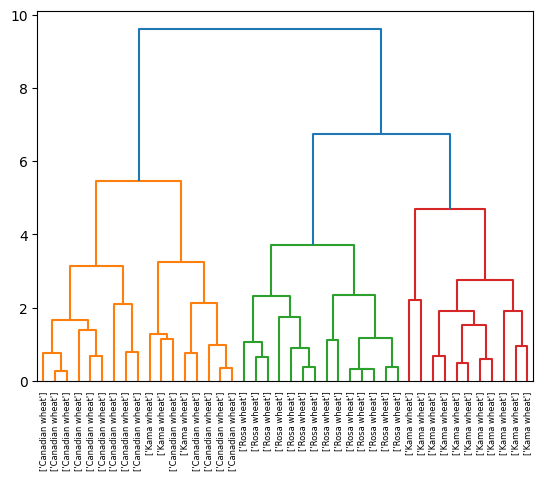

In [3]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### Exercise - Hierachies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.t.

In [4]:
# Stocks data
data = pd.read_csv("datasets/company-stock-movements-2010-2015-incl.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

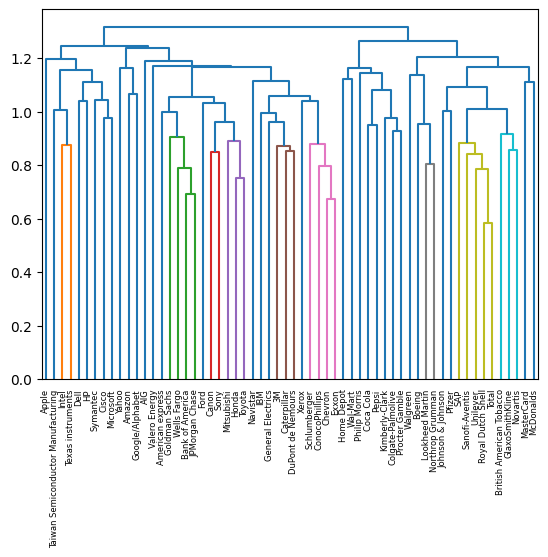

In [5]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, 
           labels=companies, 
           leaf_rotation=90, 
           leaf_font_size=6)
plt.show()

## Cluster labels in hierarchical clustering
Cluster labels in hierarchical clustering
- Hierarchical clustering is not only a visualization tool
- Cluster labels at any intermediate stage can be recovered
- For use in e.g. cross-tabulation

Dendrograms show cluster distances
- Height on dendrogram = distance between merging clusters

Intermediate clustering & height on dendrogram
- Height on dendrogram specifies max. distance between merging clusters

**Extracting cluster labels**
- Use the `fcluster()` function
- Returns a numpy array of cluster labels

**Aligning cluster labels with country names**

Given a list of string `country_names`

### Exercise - Different linkage, different hierarchical clustering
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

In [39]:
# Eurovision sample data
import pandas as pd
samples_df = pd.read_csv('./datasets/samples_eurovision.csv', index_col=[0])
samples = samples_df.to_numpy()
samples.reshape((42,26))

# Country name list
cn_df = pd.read_csv('./datasets/country-names.csv', index_col=[0])
country_names = cn_df.to_numpy()
country_names.reshape((42,))

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway',
       'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine',
       'United Kingdom'], dtype=object)

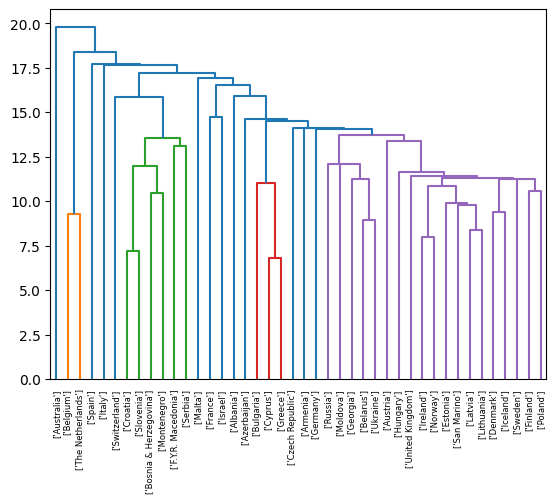

In [41]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method='single')

dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Exercise - Extracting cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [7]:
varieties_df = pd.read_csv('./datasets/varieties.csv', index_col=[0])
varieties = varieties_df.to_numpy()
varieties = varieties.flatten() 

In [8]:
mergings_df = pd.read_csv('./datasets/mergings.csv', index_col=[0])
mergings = mergings_df.to_numpy()
mergings.reshape((41,4)) 

array([[33.        , 36.        ,  0.27162909,  2.        ],
       [21.        , 26.        ,  0.31365739,  2.        ],
       [18.        , 43.        ,  0.32846589,  3.        ],
       [38.        , 41.        ,  0.34657328,  2.        ],
       [19.        , 22.        ,  0.37233454,  2.        ],
       [15.        , 27.        ,  0.38916958,  2.        ],
       [ 4.        , 11.        ,  0.48519909,  2.        ],
       [ 2.        , 13.        ,  0.60220511,  2.        ],
       [23.        , 25.        ,  0.64447995,  2.        ],
       [ 0.        ,  9.        ,  0.66671658,  2.        ],
       [32.        , 37.        ,  0.68359363,  2.        ],
       [39.        , 42.        ,  0.75541297,  3.        ],
       [12.        , 29.        ,  0.76129577,  2.        ],
       [30.        , 34.        ,  0.79066703,  2.        ],
       [24.        , 47.        ,  0.89015184,  3.        ],
       [ 1.        ,  6.        ,  0.96077742,  2.        ],
       [31.        , 45.

In [9]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


## t-SNE for 2-dimensional maps
t-SNE for 2-dimensional maps
- t-SNE = "t-distributed stochastic neighbor embedding"
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasetssets

### Exercise - t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

In [10]:
varietynumbers_df = pd.read_csv('./datasets/variety_numbers.csv', index_col=[0])
variety_numbers = varietynumbers_df.values

In [11]:
samples_df = pd.read_csv('./datasets/samples_grain_2.csv', index_col=[0])
samples = samples_df.to_numpy()
samples.reshape((210,7))

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

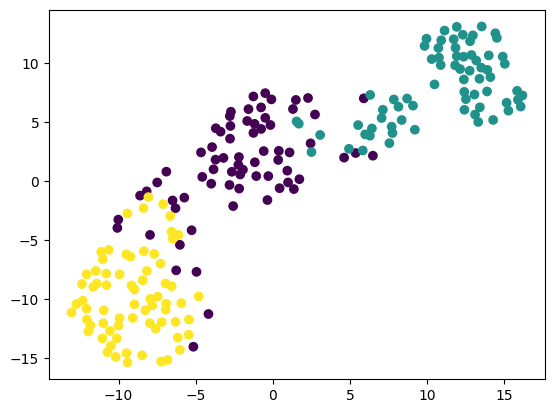

In [12]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

### Exercise - A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

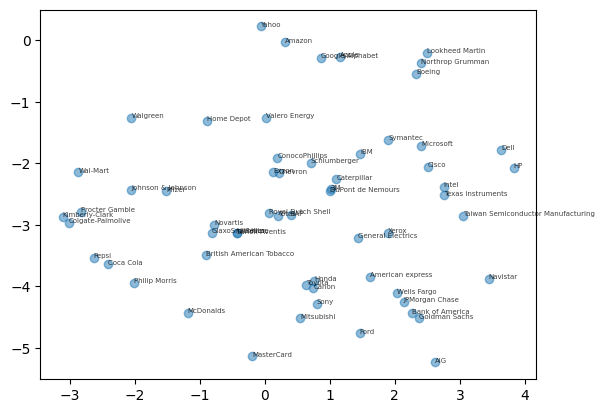

In [13]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()